# 2. Minimize
The initial structure is likely in a unstable state. We need to minimize the potential energy to relax the structure.

## 2.1. Copy files
- AIREBO force field "CH.airebo" is copied from local "Potential" folder for LAMMPS.
- Copy "data.lmp" from "1. Structure" folder.

In [3]:
from pathlib import Path
from shutil import copy
cwd = Path.cwd()

source = cwd.parent/'1. Structure'
copy(source/'data.lmp', cwd)

'c:\\Users\\fitbe\\OneDrive\\Desktop\\AO Tutorial\\LAMMPS\\2. Minimize\\data.lmp'

## 2.2. Input file

In [8]:
%%writefile in.lmp
#---------- Initization ----------#
units metal
dimension 3
boundary p p p
atom_style charge

#---------- structure ----------#
read_data data.lmp

#---------- Force Field ----------#
pair_style airebo 3.0
pair_coeff * * CH.airebo C H

#---------- Simulation ----------#
# Thermo
thermo 1
thermo_style custom step pe lx ly lz density press

# Dump
dump 1 all custom 1 dump.lmp mass type id x y z element
dump_modify 1 element C H

# Relax box
fix 1 all box/relax iso 0.0 vmax 0.001 fixedpoint 0 0 0

# Minimize
min_style cg
minimize 1.0e-10 1.0e-10 1000 10000

#---------- End ----------#
write_data data.new.lmp

Overwriting in.lmp


## 2.3. Run LAMMPS

In [9]:
!lmp -i in.lmp -l log.lmp

LAMMPS (2 Aug 2023 - Update 1)
OMP_NUM_THREADS environment is not set. Defaulting to 1 thread. (src/comm.cpp:98)
  using 1 OpenMP thread(s) per MPI task
Loaded 1 plugins from C:\Users\fitbe\AppData\Local\LAMMPS 64-bit 2Aug2023 with GUI\plugins
Reading data file ...
  orthogonal box = (0 0 0) to (36.07 36.07 36.07)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  1860 atoms
  read_data CPU = 0.004 seconds
Reading airebo potential file CH.airebo with DATE: 2011-10-25
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 12.2
  ghost atom cutoff = 12.2
  binsize = 6.1, bins = 6 6 6
  1 neighbor lists, perpetual/occasional/extra = 1 0 0
  (1) pair airebo, perpetual
      attributes: full, newton on, ghost
      pair build: full/bin/ghost
      stencil: full/ghost/bin/3d
      bin: standard
Setting up cg style minimization ...
  Unit style    : metal
  Current step  : 0
 (src/min.cpp

## 2.4. Visualize the structure
Open the "dump.lmp" using OVITO software.

## 2.5. Log file

In [10]:
# Import packages
from lammps.formats import LogFile
import pandas as pd

In [11]:
# Load log file
file = LogFile(filename='log.lmp')

# The file contains a list of runs and errors. We only have one run.
# Each run is a dictionary with thermo fields as keys, storing the values over time.
run = file.runs[0]

# Convert to pandas DataFrame
log = pd.DataFrame(run)

# Print
log

Step     PotEng         Lx         Ly         Lz   Density  \
0        0.0 -7822.1708  36.070000  36.070000  36.070000  0.299932   
1        1.0 -7822.2663  36.033930  36.033930  36.033930  0.300834   
2        2.0 -7822.2833  36.011128  36.011128  36.011128  0.301406   
3        3.0 -7822.3897  36.013520  36.013520  36.013520  0.301346   
4        4.0 -7822.3898  36.015209  36.015209  36.015209  0.301303   
...      ...        ...        ...        ...        ...       ...   
996    996.0 -7826.7179  34.679945  34.679945  34.679945  0.337463   
997    997.0 -7826.7207  34.682613  34.682613  34.682613  0.337385   
998    998.0 -7826.7209  34.680520  34.680520  34.680520  0.337447   
999    999.0 -7826.7258  34.679664  34.679664  34.679664  0.337471   
1000  1000.0 -7826.7258  34.680118  34.680118  34.680118  0.337458   

            Press  
0    -1562.377300  
1     -607.158590  
2        3.133112  
3        2.413011  
4      -43.692718  
...           ...  
996      0.714932  
997    -66.231592  
998      0.187200  
999      8.088097  
1000    -6.140722  

[1001 rows x 7 columns]

<Axes: xlabel='Step', ylabel='Potential Energy (eV)'>

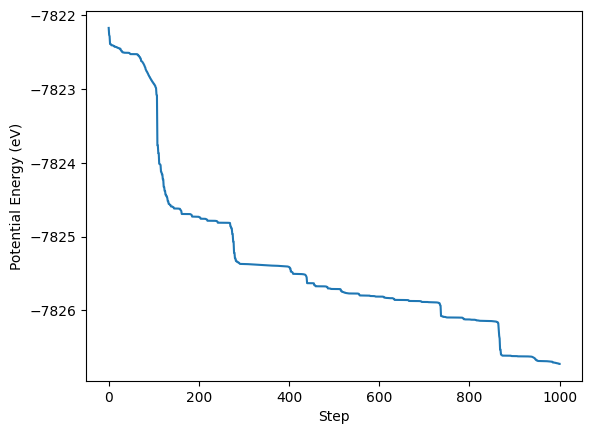

In [12]:
# Plot the potential energy
log.plot(x='Step', y='PotEng', ylabel='Potential Energy (eV)', legend=False)

<Axes: xlabel='Step', ylabel='Density (g/cm^3)'>

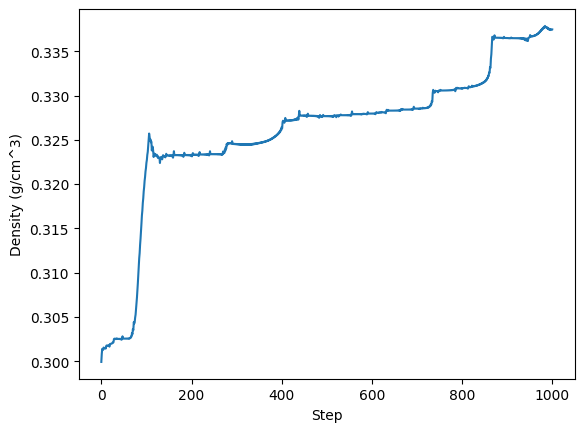

In [13]:
# Plot the density
log.plot(x='Step', y='Density', ylabel='Density (g/cm^3)', legend=False)